In [1]:
cd ..

/home/tommy/Scrivania/Polimi/Honours Programme/SCFR


In [2]:
from data_structures.cfr_trees import *
from data_structures.trees import *
from cfr_code.reconstruction_cfr import *
from cfr_code.sample_cfr import *
from utilities.graphs import *
from games.kuhn import build_kuhn_tree

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
def test_random(d, p, i, RCFR_it, RCFR_rec_every, SCFR_it, xaxis, ybottom = 0, reconstructPlayersTogether = False,
                show_perc = False):
    tree = randomTree(d, p, i)
    cfr_tree = CFRTree(tree)
    ct1 = CFRTree(tree)
    res1 = SolveWithReconstructionCFR(ct1, RCFR_it, show_perc = show_perc, checkEveryIteration = 1, 
                                      reconstructEveryIteration = RCFR_rec_every,
                                      reconstructPlayersTogether = reconstructPlayersTogether,
                                      reconstructWithOptimalPlan = False)
    
    #ct3 = CFRTree(tree)
    #res3 = SolveWithReconstructionCFR(ct3, RCFR_it, show_perc = show_perc, checkEveryIteration = 1, 
    #                                  reconstructEveryIteration = RCFR_rec_every,
    #                                  reconstructPlayersTogether = reconstructPlayersTogether,
    #                                  reconstructWithOptimalPlan = False)
    ct2 = CFRTree(tree)
    res2 = SolveWithSampleCFR(ct2, SCFR_it, show_perc = show_perc, checkEveryIteration = 1)
    comparative_epsilon_graph([res1, res2], xaxis = xaxis, ybottom = ybottom)
    return (res1, res2, tree, ct1, ct2)

------------ RCFR -------------
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
------------ RCFR+ -------------
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
------------ SCFR -------------
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%


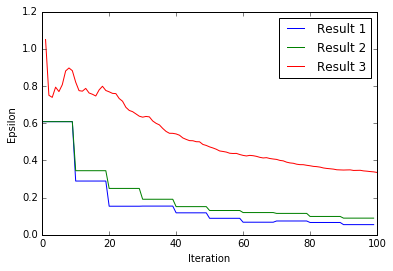

72.88977575302124
67.33653235435486
11.038153886795044


In [36]:
def test_kuhn():
    tree = build_kuhn_tree(3, 6)
    cfr_tree = CFRTree(tree)
    print("------------ RCFR -------------")
    ct1 = CFRTree(tree)
    res1 = SolveWithReconstructionCFR(ct1, 100, show_perc = True, checkEveryIteration = 1, 
                                      reconstructEveryIteration = 10)
    print("------------ RCFR+ -------------")
    ct2 = CFRTree(tree)
    res2 = SolveWithReconstructionCFR(ct2, 100, show_perc = True, checkEveryIteration = 1, 
                                      reconstructEveryIteration = 10, use_cfr_plus = True)
    print("------------ SCFR -------------")
    ct3 = CFRTree(tree)
    res3 = SolveWithSampleCFR(ct3, 100, show_perc = True, checkEveryIteration = 1)
    comparative_epsilon_graph([res1, res2, res3], xaxis = 'time')
    return (res1, res2, res3, tree)


(res1, res2, res3, tree) = test_kuhn()
    
print(res1["tot_time"])
print(res2["tot_time"])
print(res3["tot_time"])

# Multiple players at once

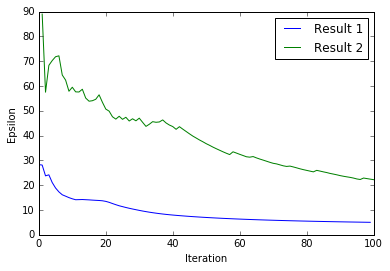

({'graph_data': [{'duration': 4.468305587768555,
    'epsilon': [-17.484982280413448, -28.297478435725623],
    'iteration_number': 0,
    'marginal_epsilon': [-39.25803993293707, -23.703551287913456],
    'utility': [49.556774881877736, 49.765584514555684]},
   {'duration': 0.5742537975311279,
    'epsilon': [-10.28244042728258, -28.128138941004636],
    'iteration_number': 1,
    'marginal_epsilon': [-27.099122091207576, -20.55414901228731],
    'utility': [82.29182218376509, 66.8346613555055]},
   {'duration': 1.1480207443237305,
    'epsilon': [-9.240435732832552, -23.770784583381698],
    'iteration_number': 2,
    'marginal_epsilon': [-19.84568893550059, -17.925801624387987],
    'utility': [96.11087534615976, 72.03210322842637]},
   {'duration': 2.4173214435577393,
    'epsilon': [-7.592407431755632, -24.180035547514336],
    'iteration_number': 3,
    'marginal_epsilon': [-16.357184207440596, -16.279501287859247],
    'utility': [91.84979847335866, 84.70557382172099]},
   {'dur

In [42]:
test_random(8, 3, 1, 100, 1, 100, 'iterations')

In [32]:
ct1.root.buildRealizationForm(None, 1)

In [33]:
leaves = set()
ct1.root.find_terminals(leaves)

In [34]:
for l in leaves:
    print(l.omega)

0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


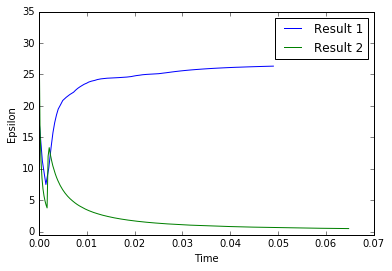

In [77]:
(res1, res2, tree) = test_random(3, 2, 1, 100, 1, 300, 'time', ybottom = -0.5, reconstructPlayersTogether = True)

In [78]:
tree.display()

Player 0 - Infoset 0 - Node 0
Player 1 - Infoset 1 - Node 1 (children of Node0 via Action 0.0)
Player 1 - Infoset 2 - Node 2 (children of Node0 via Action 0.1)
Player 0 - Infoset 3 - Node 3 (children of Node1 via Action 1.0)
Player 0 - Infoset 4 - Node 4 (children of Node1 via Action 1.1)
Leaf7 (children of Node3 via Action 3.0) -  utility is [57, 58]
Leaf8 (children of Node3 via Action 3.1) -  utility is [71, 25]
Leaf9 (children of Node4 via Action 4.0) -  utility is [39, 57]
Leaf10 (children of Node4 via Action 4.1) -  utility is [55, 45]
Player 0 - Infoset 5 - Node 5 (children of Node2 via Action 2.0)
Player 0 - Infoset 6 - Node 6 (children of Node2 via Action 2.1)
Leaf11 (children of Node5 via Action 5.0) -  utility is [73, 57]
Leaf12 (children of Node5 via Action 5.1) -  utility is [63, 30]
Leaf13 (children of Node6 via Action 6.0) -  utility is [12, 84]
Leaf14 (children of Node6 via Action 6.1) -  utility is [98, 39]


In [80]:
res1['joint'].plans

{'a0.1a1.0a2.0a3.0a4.0a5.0a6.0': 98.0,
 'a0.1a1.0a2.0a3.0a4.0a5.0a6.1': 0.75,
 'a0.1a1.0a2.1a3.0a4.0a5.0a6.1': 1.25}

In [82]:
res1['graph_data'][-1:]

[{'duration': 0.00035858154296875,
  'epsilon': [0.0, -26.324999999999996],
  'iteration_number': 99,
  'marginal_epsilon': [-0.16008749999998884, -0.3105125000000015],
  'utility': [73.0, 57.0]}]

In [81]:
res2['joint'].plans

{'a0.0a1.0a2.1a3.1a4.1': 1,
 'a0.0a1.1a2.0a3.0a4.0': 1,
 'a0.1a1.0a2.0a5.0a6.0': 3,
 'a0.1a1.0a2.0a5.0a6.1': 15,
 'a0.1a1.0a2.1a5.0a6.0': 1,
 'a0.1a1.0a2.1a5.0a6.1': 1,
 'a0.1a1.1a2.0a5.0a6.1': 275,
 'a0.1a1.1a2.1a5.0a6.1': 3}

In [94]:
c_tree = CFRTree(tree)
rrr = SolveWithReconstructionCFR(c_tree, 100, reconstructPlayersTogether = True)
c_tree2 = CFRTree(tree)
rrr2 = SolveWithSampleCFR(c_tree2, 100)

In [95]:
for iset in c_tree.information_sets.values():
    print(str(iset) + " - " + str(iset.current_strategy))
    
print("----------------------")
    
for iset in c_tree2.information_sets.values():
    print(str(iset) + " - " + str(iset.current_strategy))

<InfoSet0 - Player0> - [0.0, 1.0]
<InfoSet1 - Player1> - [0.0, 1.0]
<InfoSet2 - Player1> - [1.0, 0.0]
<InfoSet3 - Player0> - [0.0, 1.0]
<InfoSet4 - Player0> - [0.0, 1.0]
<InfoSet5 - Player0> - [1.0, 0.0]
<InfoSet6 - Player0> - [0.0, 1.0]
----------------------
<InfoSet0 - Player0> - [0.0, 1.0]
<InfoSet1 - Player1> - [0.0, 1.0]
<InfoSet2 - Player1> - [1.0, 0.0]
<InfoSet3 - Player0> - [0.5, 0.5]
<InfoSet4 - Player0> - [0.0, 1.0]
<InfoSet5 - Player0> - [1.0, 0.0]
<InfoSet6 - Player0> - [0.0, 1.0]


# Profiling

In [5]:
%load_ext line_profiler

10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%


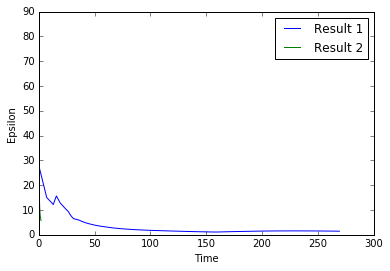

In [19]:
%lprun -f CFRInformationSet.updateSupportingPlan test_random(6, 3, 0, 100, 1, 100, xaxis = 'time', show_perc = True)

# Do not optimize over plans

----------------(6, 2, 1)----------------


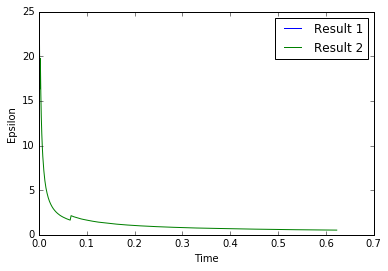

----------------(8, 2, 1)----------------


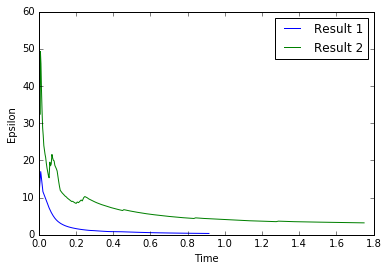

----------------(10, 2, 1)----------------


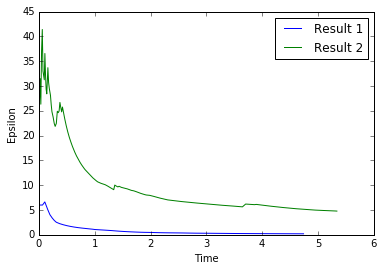

----------------(12, 2, 1)----------------


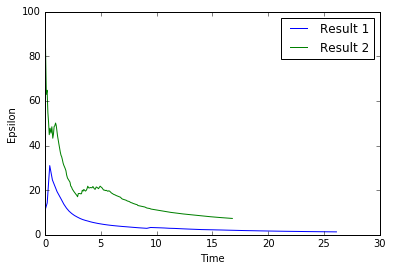

----------------(13, 2, 1)----------------


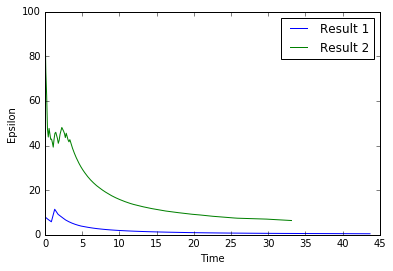

----------------(6, 2, 0)----------------


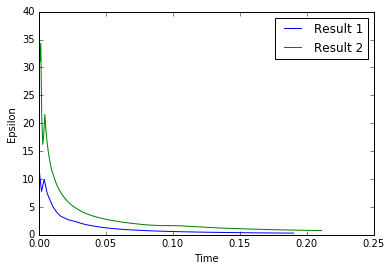

----------------(8, 2, 0)----------------


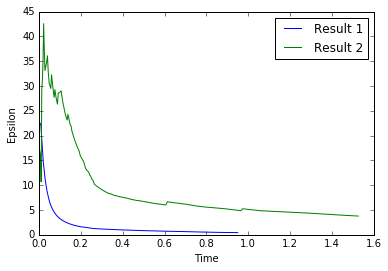

----------------(10, 2, 0)----------------


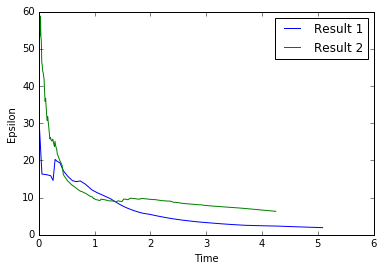

----------------(12, 2, 0)----------------


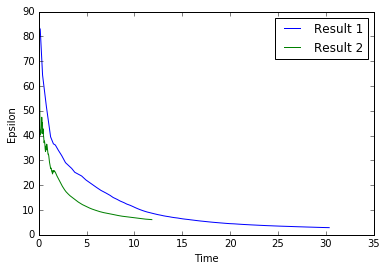

----------------(13, 2, 0)----------------


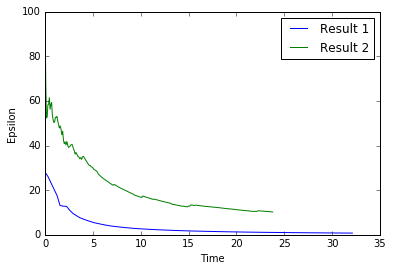

In [5]:
dims = [(6, 2, 1),(8, 2, 1),(10, 2, 1),(12, 2, 1),(13, 2, 1),
        (6, 2, 0),(8, 2, 0),(10, 2, 0),(12, 2, 0),(13, 2, 0)]

for (d, p, i) in dims:
    print("----------------" + str((d, p, i)) + "----------------")
    _ = test_random(d, p, i, 100, 1, 200, xaxis = 'time')

----------------(5, 3, 1)----------------


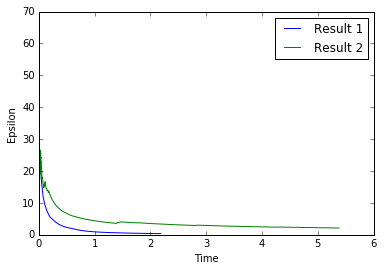

----------------(6, 3, 1)----------------


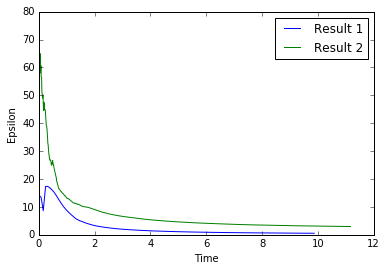

----------------(7, 3, 1)----------------


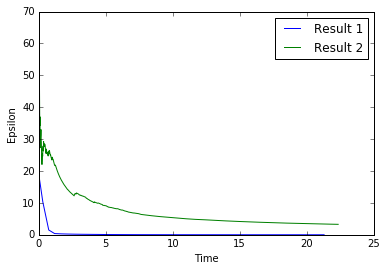

----------------(8, 3, 1)----------------


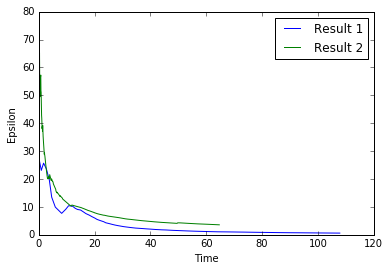

----------------(9, 3, 1)----------------


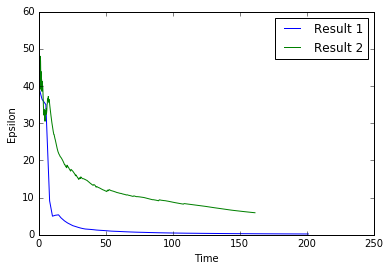

----------------(5, 3, 0)----------------


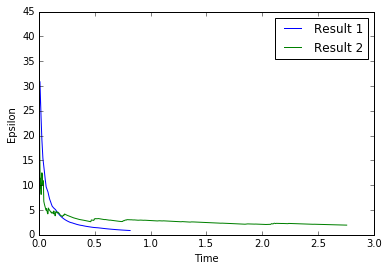

----------------(6, 3, 0)----------------


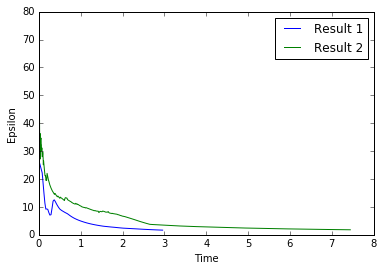

----------------(7, 3, 0)----------------


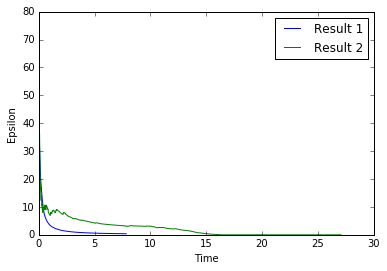

----------------(8, 3, 0)----------------


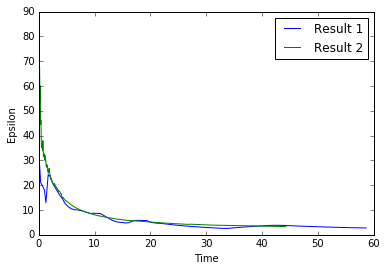

----------------(9, 3, 0)----------------


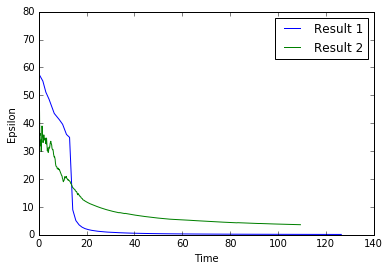

In [6]:
dims = [(5, 3, 1),(6, 3, 1),(7, 3, 1),(8, 3, 1),(9, 3, 1),
       (5, 3, 0),(6, 3, 0),(7, 3, 0),(8, 3, 0),(9, 3, 0)]

for (d, p, i) in dims:
    print("----------------" + str((d, p, i)) + "----------------")
    _ = test_random(d, p, i, 100, 1, 500, xaxis = 'time')